In [1]:
cd /content/drive/MyDrive/DeepLearningRec/XunFei

/content/drive/MyDrive/DeepLearningRec/XunFei


## 数据总览

In [2]:
ls


 Dataset/  'Date Analys.ipynb'


In [3]:
train_path = './Dataset/train'
test_path = './Dataset/test'

In [4]:
import os
import numpy as np
import pandas as pd

TRAIN_COLUMNS = ['pid', 'label', 'gender', 'age', 'tagid', 'time', 'province', 'city', 'model', 'make']
TEST_COLUMNS = ['pid', 'gender', 'age', 'tagid', 'time', 'province', 'city', 'model', 'make']

train_data = pd.read_table(os.path.join(train_path, 'train.txt'), sep=',', names=TRAIN_COLUMNS)
test_data = pd.read_table(os.path.join(test_path, 'apply_new.txt'), sep=',', names=TEST_COLUMNS)

In [6]:
train_data.shape

(300000, 10)

In [7]:
test_data.shape

(100000, 9)

In [8]:
# 性别缺失值很多，age 缺失 1/8 左右
train_data.isnull().sum()

pid              0
label            0
gender      242362
age          38631
tagid            0
time             0
province         0
city             0
model            0
make             0
dtype: int64

In [9]:
# 可以看到，测试数据集和数据缺失情况和训练数据集差不多
test_data.isnull().sum()

pid             0
gender      83776
age         12871
tagid           0
time            0
province        0
city            0
model           0
make            0
dtype: int64

In [10]:
# 感觉pid没有什么用，每一个用户只有一条记录，pid几乎是无用信息
train_data['pid'].nunique()

300000

In [11]:
test_data['pid'].nunique()

100000

In [12]:
# 正负样本很均衡
train_data['label'].value_counts()

1    150000
0    150000
Name: label, dtype: int64

In [13]:
# 性别占比为 男：女 = 3:2
train_data['gender'].value_counts()

0.0    34323
1.0    23315
Name: gender, dtype: int64

In [14]:
test_data['gender'].value_counts()

0.0    10069
1.0     6155
Name: gender, dtype: int64

In [15]:
# 主要的年龄集中在 20-40 岁
train_data['age'].value_counts()

3.0    66861
4.0    61678
1.0    41278
5.0    39936
2.0    32632
6.0    18984
Name: age, dtype: int64

In [16]:
# 训练集和测试集的年龄分布类似
test_data['age'].value_counts()

3.0    22716
4.0    18279
1.0    13910
2.0    12608
5.0    12411
6.0     7205
Name: age, dtype: int64

In [17]:
# 查看省份的情况：
train_data['province'].nunique()

34

In [18]:
train_data['province'].value_counts()

山东     24759
河南     20491
河北     19684
广东     19462
四川     19192
浙江     19187
江苏     17421
辽宁     14754
江西     13393
山西     11375
湖南     10713
广西     10697
北京      9881
安徽      9208
黑龙江     9194
福建      8509
云南      8272
吉林      7717
贵州      7418
湖北      6974
内蒙古     6518
陕西      6381
重庆      4937
甘肃      3621
上海      2511
天津      2371
海南      2256
宁夏      1893
青海       726
新疆       277
西藏       181
香港        20
台湾         6
澳门         1
Name: province, dtype: int64

In [19]:
test_data['province'].value_counts()

山东     8143
广东     7024
浙江     6922
四川     6454
河北     6287
河南     6216
江苏     5803
辽宁     4866
江西     4474
山西     3727
广西     3548
北京     3502
湖南     3457
安徽     3115
黑龙江    2881
福建     2867
云南     2809
贵州     2492
吉林     2488
湖北     2413
陕西     2167
内蒙古    2112
重庆     1618
甘肃     1089
上海      890
天津      799
海南      779
宁夏      625
青海      234
新疆      110
西藏       82
香港        5
澳门        1
台湾        1
Name: province, dtype: int64

In [20]:
# 城市信息
train_data['city'].value_counts()

北京     9881
成都     6694
重庆     4937
贵阳     4729
石家庄    4128
       ... 
楚雄        3
文山        2
临夏        1
昌吉        1
澳门        1
Name: city, Length: 315, dtype: int64

In [21]:
test_data['city'].value_counts()

北京             3502
成都             2293
重庆             1618
贵阳             1521
沈阳             1348
               ... 
吐鲁番               2
克孜勒苏柯尔克孜自治州       2
林芝                1
台湾                1
澳门                1
Name: city, Length: 310, dtype: int64

In [22]:
# 查看训练集中
train_province_city_info = train_data.groupby('province')['city'].nunique().reset_index()

In [23]:
train_province_city_info

,province,city
0,上海,1
1,云南,11
2,内蒙古,12
3,北京,1
4,台湾,1
5,吉林,8
6,四川,18
7,天津,1
8,宁夏,5
9,安徽,16


In [24]:
test_province_city_info = test_data.groupby('province')['city'].nunique().reset_index()

In [25]:
test_province_city_info

,province,city
0,上海,1
1,云南,8
2,内蒙古,12
3,北京,1
4,台湾,1
5,吉林,8
6,四川,18
7,天津,1
8,宁夏,5
9,安徽,16


In [26]:
train_province_city_info.merge(test_province_city_info, on='province', how='left')

,province,city_x,city_y
0,上海,1,1
1,云南,11,8
2,内蒙古,12,12
3,北京,1,1
4,台湾,1,1
5,吉林,8,8
6,四川,18,18
7,天津,1,1
8,宁夏,5,5
9,安徽,16,16


In [27]:
train_province_city_info = train_data.groupby('province')['city'].unique().reset_index()

In [28]:
train_province_city_info

,province,city
0,上海,[上海]
1,云南,"[曲靖, 昆明, 玉溪, 临沧, 昭通, 保山, 丽江, 普洱, 大理, 文山, 楚雄]"
2,内蒙古,"[锡林郭勒盟, 鄂尔多斯, 巴彦淖尔, 呼伦贝尔, 呼和浩特, 赤峰, 通辽, 兴安盟, 乌..."
3,北京,[北京]
4,台湾,[台湾]
5,吉林,"[松原, 四平, 长春, 辽源, 白山, 通化, 吉林, 白城]"
6,四川,"[成都, 泸州, 遂宁, 广安, 绵阳, 自贡, 乐山, 雅安, 巴中, 内江, 广元, 攀..."
7,天津,[天津]
8,宁夏,"[银川, 石嘴山, 吴忠, 固原, 中卫]"
9,安徽,"[芜湖, 阜阳, 合肥, 淮北, 蚌埠, 宣城, 宿州, 马鞍山, 安庆, 淮南, 池州, ..."


In [29]:
test_province_city_info = test_data.groupby('province')['city'].unique().reset_index()
test_province_city_info

,province,city
0,上海,[上海]
1,云南,"[昆明, 昭通, 玉溪, 临沧, 保山, 普洱, 曲靖, 丽江]"
2,内蒙古,"[呼和浩特, 通辽, 包头, 鄂尔多斯, 乌兰察布, 赤峰, 兴安盟, 锡林郭勒盟, 呼伦贝..."
3,北京,[北京]
4,台湾,[台湾]
5,吉林,"[吉林, 长春, 白城, 白山, 松原, 通化, 四平, 辽源]"
6,四川,"[德阳, 成都, 攀枝花, 南充, 巴中, 绵阳, 自贡, 宜宾, 泸州, 遂宁, 眉山, ..."
7,天津,[天津]
8,宁夏,"[银川, 吴忠, 固原, 石嘴山, 中卫]"
9,安徽,"[滁州, 宿州, 合肥, 宣城, 亳州, 淮南, 安庆, 阜阳, 芜湖, 六安, 淮北, 黄..."


In [31]:
# 查看手机品牌和手机的型号信息

In [30]:
train_models = train_data['model'].unique()

In [31]:
test_models = test_data['model'].unique()

In [32]:
test_model_only = []
for model in test_models:
  if model not in train_models:
    test_model_only.append(model)

In [33]:
test_model_counts = test_data['model'].value_counts()

In [34]:
# 以下这些品牌的手机只在测试集中出现而不在训练集中出现
# 但是占的比例很小
for model in test_model_only:
  print(model, ':', test_model_counts[model])

黑鲨 : 119
Utoutu : 1
世纪星 : 1
爱我 : 1
云创通 : 1
8848钛金手机 : 2
东芝 : 1
台电 : 1
瑞芯 : 1
斐讯 : 1
E人E本 : 1


In [206]:
train_data.groupby('model')['make'].nunique().reset_index()

,model,make
0,360,25
1,8848,4
2,AGM,2
3,ALLWINNER,1
4,COMIO,5
...,...,...
114,青橙,1
115,飞利浦,3
116,魅族,83
117,魅果,4


In [36]:
model_counts = train_data['model'].value_counts()

In [37]:
train_data['make'].nunique()

1398

In [38]:
# 查看标签的信息和时间戳的信息
train_data['tagid'] = train_data['tagid'].apply(lambda x: x[1: -1].split(','))

In [39]:
train_data['time'] = train_data['time'].apply(lambda x: x[1: -1].split(','))

In [40]:
train_data['tag_length'] = train_data['tagid'].apply(lambda x: len(x))

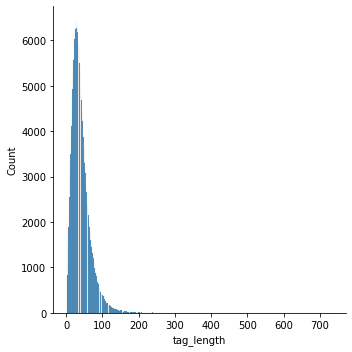

In [41]:
import seaborn as sns

sns.displot(train_data['tag_length'])

In [42]:
train_data['tag_length'].max()

734

In [43]:
train_data['tag_length'].min()

1

In [44]:
train_data['tag_length'].mean()

40.539053333333335

In [45]:
train_data['tag_length'].median()

35.0

In [46]:
# 对测试集种的标签数据进行分析
test_data['tagid'] = test_data['tagid'].apply(lambda x: x[1: -1].split(','))
test_data['time'] = test_data['time'].apply(lambda x: x[1: -1].split(','))
test_data['tag_length'] = test_data['tagid'].apply(lambda x: len(x))

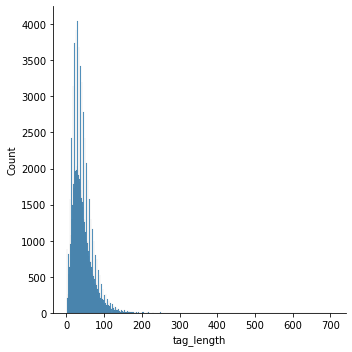

In [47]:
sns.displot(test_data['tag_length'])

In [48]:
test_data['tag_length'].max()

705

In [49]:
test_data['tag_length'].min()

1

In [50]:
test_data['tag_length'].mean()

42.55533

In [51]:
test_data['tag_length'].median()

37.0

In [52]:
# 看一下不同的 tagid 数目一共有多少
unique_tagids = set([])

def get_unique_tagid(x):
  for tag in x:
    if tag not in unique_tagids:
      unique_tagids.add(tag)
  return x

train_data['tagid'].apply(lambda x: get_unique_tagid(x))

0         [4457057, 9952871, 8942704, 11273992, 12410356...
1         [10577375, 13567578, 4437795, 8934804, 9352464...
2         [11171956, 9454883, 9361934, 10578048, 1023446...
3         [4457927, 9412324, 12292192, 9231799, 11977927...
4         [5737867, 5105608, 13792904, 5454488, 13098817...
                                ...                        
299995    [12545416, 9993722, 12163016, 5674849, 1366921...
299996    [10882324, 4051451, 9446894, 13669217, 1306820...
299997    [9302361, 11141111, 13056107, 11972537, 125749...
299998    [10560059, 13603256, 10978146, 13596171, 88131...
299999    [9667788, 11333156, 11186028, 14060763, 125463...
Name: tagid, Length: 300000, dtype: object

In [53]:
train_unique_tags = unique_tagids

In [54]:
unique_tagids = set([])
test_data['tagid'].apply(lambda x: get_unique_tagid(x))

0        [4447574, 9297337, 12291830, 8960351, 11316307...
1        [11185398, 9645062, 13055501, 12826779, 133319...
2        [13498871, 13737915, 12163016, 10961428, 10998...
3        [12123770, 11180532, 13055061, 9770031, 125924...
4        [12518145, 10597505, 5421529, 9087905, 1362648...
                               ...                        
99995    [91325, 456871, 13820427, 12291830, 13516301, ...
99996    [11871458, 10982847, 12783381, 12545416, 13329...
99997    [10567612, 10978146, 9381689, 10278852, 108823...
99998    [10757291, 13055501, 11185398, 10982847, 30370...
99999    [11219658, 10757721, 11755428, 13343061, 10982...
Name: tagid, Length: 100000, dtype: object

In [55]:
test_unique_tags = unique_tagids

In [57]:
len(test_unique_tags)

104735

In [56]:
len(train_unique_tags)

204572

In [58]:
# 但是是否在测试集中出现的标签全部都在训练集中出现过呢
# 可以看到有两万多的标签没有在训练集中的出现过
# 训练集标签加测试机标签一共 1600多万，一共22万标签
# 是否可以考虑对标签序列进行预训练处理
# 序列的处理：word2vec预训练、tf-idf、各种embedding、transformer、LSTM、GRU、RNN、text-cnn 等方式都可以尝试
len(test_unique_tags - train_unique_tags)

26065

In [59]:
train_data['tag_length'].sum()

12161716

In [60]:
test_data['tag_length'].sum()

4255533

In [61]:
train_data['tag_unique'] = train_data['tagid'].apply(lambda x: list(set(x)))

In [62]:
train_data['tag_unique_length'] = train_data['tag_unique'].apply(lambda x: len(x))

In [63]:
train_data['tag_unique_length'].sum()

12154410

## 分析训练数据集
      分析数据集中每一个特征与标签之间的关系，大致确定哪些特征可能是对标签的影响比较大的。
      

In [64]:
# gender、age、tagid、time、province、city、model、make

In [65]:
# 1.性别数据缺失值很多，但是仍然可以就性别没有缺失的数据进行分析
gender_info = train_data[~train_data['gender'].isnull()][['label', 'gender']]

In [66]:
gender_info.shape

(57638, 2)

In [67]:
gender_info['label'].sum()

32179

In [68]:
gender_info[gender_info['label'] == 1]['gender'].value_counts()

0.0    19611
1.0    12568
Name: gender, dtype: int64

In [69]:
gender_info[gender_info['label'] == 0]['gender'].value_counts()

0.0    14712
1.0    10747
Name: gender, dtype: int64

In [ ]:
# 好像性别的差距不是很大啊

([<matplotlib.patches.Wedge at 0x7f927f6ccb90>,
 [Text(0.796606205556427, 0.7585634800522575, '4.0'),
  Text(-0.6779988371943796, 0.8662087374086395, '3.0'),
  Text(-1.0033509336068847, -0.45087349005036115, '1.0'),
  Text(-0.07666800756268896, -1.0973249366602253, '5.0'),
  Text(0.7875629741826413, -0.7679482806130842, '2.0'),
  Text(1.0814557110169556, -0.20113066675375768, '6.0')])

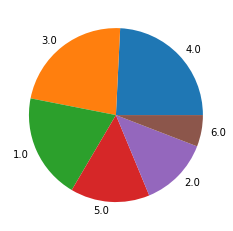

In [70]:
# 2.分析不同的年龄段之间的差异：
#  分别画出不同年龄段占所有label为1的比例和不同年龄段的人
from matplotlib import pyplot as plt

age_info = train_data[train_data['label'] == 1]['age'].value_counts()
plt.pie(age_info.values, labels=age_info.keys())

In [71]:
# 分别看看不同年龄段的人，label为1的比例：
# 可以看到不同的年龄段的人在比例上还是有些差异的，基本上是负相关
for i in range(1, 7):
  print(train_data[train_data['age'] == i]['label'].sum() / train_data[train_data['age'] == i].shape[0])

0.6322738504772518
0.5258948271635204
0.45184786347796174
0.5227309575537469
0.4909354967948718
0.4103982300884956


In [72]:
# 3.tag_id和时间戳信息，一共有20多万个tag
#  可以分别从考虑时间戳和不考虑时间戳的角度进行分析：
# 3.1 如果不考虑时间戳就是看标签出现的次数，或者是可以进行关联规则挖掘？？是个有趣的思路
##

In [73]:
# 将标签按照时间戳顺序排列：
pid = []
tagid = []
time = []

for sub_data in train_data.values:
  s_tagid = sub_data[4]
  s_time = sub_data[5]
  for x, y in zip(s_tagid, s_time):
    pid.append(sub_data[0])
    tagid.append(x)
    time.append(y)

In [85]:
new_Data = pd.DataFrame()
new_Data['pid'] = pid
new_Data['tagid'] = tagid
new_Data['time'] = time

In [86]:
new_Data['time'] = new_Data['time'].astype(float)
new_Data['time'] = new_Data['time'].astype('int64')

In [87]:
new_Data['date'] = pd.to_datetime(new_Data['time'], unit='ms')

new_Data = new_Data.sort_values(['pid', 'time'])

In [88]:
new_Data = new_Data.merge(train_data[['pid', 'label']], on='pid', how='left')

In [103]:
click_tag_info = new_Data[new_Data['label'] == 1]['tagid'].value_counts().reset_index()

In [105]:
click_tag_info.rename(columns={'tagid': 'click_nums'}, inplace=True)

In [102]:
not_click_tag_info = new_Data[new_Data['label'] == 0]['tagid'].value_counts().reset_index()

In [106]:
not_click_tag_info.rename(columns={'tagid': 'not_click_nums'}, inplace=True)

In [108]:
tag_info = pd.merge(click_tag_info, not_click_tag_info, on='index', how='outer')

In [109]:
tag_info[['click_nums', 'not_click_nums']] = tag_info[['click_nums', 'not_click_nums']].fillna(0)

In [120]:
new_Data

,pid,tagid,time,date,label
0,1000001,9957616,1619084610810,2021-04-22 09:43:30.810,0
1,1000001,8942704,1619084610810,2021-04-22 09:43:30.810,0
2,1000001,13329883,1619084610810,2021-04-22 09:43:30.810,0
3,1000001,11871458,1619084610810,2021-04-22 09:43:30.810,0
4,1000001,9952871,1619084610810,2021-04-22 09:43:30.810,0
...,...,...,...,...,...
12161711,1300000,9126147,1615378136018,2021-03-10 12:08:56.018,1
12161712,1300000,12581669,1615378136018,2021-03-10 12:08:56.018,1
12161713,1300000,11218923,1615378136018,2021-03-10 12:08:56.018,1
12161714,1300000,11395534,1615378136018,2021-03-10 12:08:56.018,1


In [121]:
user_tag_by_time = new_Data.groupby(['pid', 'time'])['tagid'].apply(list).reset_index()

In [127]:
user_tag_by_time['date'] = pd.to_datetime(user_tag_by_time['time'], unit='ms')

In [122]:
user_tag_by_time = user_tag_by_time.merge(train_data[['pid', 'label']], on='pid', how='left')

In [123]:
last_info = user_tag_by_time.groupby('pid').agg('last').reset_index()

In [128]:
user_tag_by_time

,pid,time,tagid,label,date
0,1000001,1619084610810,"[9957616, 8942704, 13329883, 11871458, 9952871...",0,2021-04-22 09:43:30.810
1,1000001,1620653728050,[9473477],0,2021-05-10 13:35:28.050
2,1000002,1569982716201,"[4437795, 12410356]",0,2019-10-02 02:18:36.201
3,1000002,1580363254578,[5737867],0,2020-01-30 05:47:34.578
4,1000002,1589172682078,[11219658],0,2020-05-11 04:51:22.078
...,...,...,...,...,...
3510746,1300000,1570208439517,[10158594],1,2019-10-04 17:00:39.517
3510747,1300000,1571385905173,"[13056107, 12941454]",1,2019-10-18 08:05:05.173
3510748,1300000,1573131573876,[11219658],1,2019-11-07 12:59:33.876
3510749,1300000,1574643174471,"[3320497, 9979622]",1,2019-11-25 00:52:54.471


In [130]:
last_info['date'] = pd.to_datetime(last_info['time'], unit='ms')

In [132]:
last_info

,pid,time,tagid,label,date
0,1000001,1620653728050,[9473477],0,2021-05-10 13:35:28.050
1,1000002,1614937400514,"[11381693, 12245199, 10786589]",0,2021-03-05 09:43:20.514
2,1000003,1620279143737,[11219658],0,2021-05-06 05:32:23.737
3,1000004,1589632710397,[13282087],0,2020-05-16 12:38:30.397
4,1000005,1615752947574,[11274828],0,2021-03-14 20:15:47.574
...,...,...,...,...,...
299995,1299996,1605929422057,"[13228287, 9124660, 5120194, 12546375, 1078834...",1,2020-11-21 03:30:22.057
299996,1299997,1608341592170,"[9370831, 12180697]",1,2020-12-19 01:33:12.170
299997,1299998,1609490005782,"[14037741, 11219658, 10240512]",1,2021-01-01 08:33:25.782
299998,1299999,1616615286657,"[11191708, 12966250]",1,2021-03-24 19:48:06.657


In [134]:
tag_nums = new_Data['tagid'].value_counts().reset_index()

In [ ]:
tag_nums

In [ ]:
last_info_tag_counts = dict({})

def statistic(x):
  for tag in x:
    last_info_tag_counts[tag] = last_info_tag_counts.get(tag, 0) + 1
  return x

last_info[last_info['label'] == 0]['tagid'].apply(lambda x: statistic(x))

In [192]:
click_last_tag_info = last_info_tag_counts

In [83]:
not_click_last_tag_info = last_info_tag_counts

In [200]:
click_last_tag_df = pd.DataFrame({'tagid': click_last_tag_info.keys(), 'clikc_counts': click_last_tag_info.values()})

In [201]:
not_click_last_tag_df = pd.DataFrame({'tagid': not_click_last_tag_info.keys(), 'not_click_counts': not_click_last_tag_info.values()})

In [202]:
last_tag_df = pd.merge(click_last_tag_df, not_click_last_tag_df, on='tagid', how='left')

In [206]:
last_tag_df['not_click_counts'] = last_tag_df['not_click_counts'].fillna(0).astype(np.int32)

In [207]:
last_tag_df['rate'] = last_tag_df['not_click_counts'] / last_tag_df['clikc_counts']

In [241]:
last_tag_df.sort_values('rate', ascending=True).iloc[28870:29000, :]

,tagid,clikc_counts,not_click_counts,rate
3888,6016791,1,0,0.000000
824,8566256,1,0,0.000000
10816,12852940,39,1,0.025641
1543,13952014,66,2,0.030303
1240,10739889,561,20,0.035651
...,...,...,...,...
30680,11322206,8,1,0.125000
29907,13228234,8,1,0.125000
30681,10232183,8,1,0.125000
3783,14037255,8,1,0.125000


In [183]:
a = sorted(last_info_tag_counts.items(), key=lambda x: x[1], reverse=True)

In [186]:
b = sorted(last_info_tag_counts.items(), key=lambda x: x[1], reverse=True)

In [175]:
# 对于标签的分析存在以下结论：
# 1.标签分布是极其严重的长尾分布
# 2.出现次数最多的前几标签在正负样本中比较均衡；
# 3.部分出现次数中等的标签在正负样本中差异很大，也许是划分的关键；
# 4.尾部很多出现次数个位数的标签在正负样本种差异很大，也许蕴含关键信息，也可能是噪声
# 5.标签生成时间间隔，短则几天，长则几个月，时间效应应该考虑进来

In [ ]:
# 3.2 如果考虑时间戳就是要考虑变化的情况或者重点研究最后邻近时刻的情况
#   也可以按照序列的思路进行处理，word2vec，transformer，attention等等思路可能都是可以采用的

In [159]:
# 4.查看不同省份的情况
province_sum = train_data.groupby('province').size().reset_index()

In [160]:
province_click_sum = train_data[train_data['label'] == 1].groupby('province').size().reset_index()

In [161]:
province_click_sum.rename(columns={0: 'province_click_sum'}, inplace=True)

In [162]:
province_sum = pd.merge(province_sum, province_click_sum, on='province', how='left')

In [163]:
province_click_sum

,province,province_click_sum
0,上海,1614
1,云南,3651
2,内蒙古,2934
3,北京,5603
4,台湾,4
5,吉林,2310
6,四川,7027
7,天津,1583
8,宁夏,902
9,安徽,4181


In [164]:
province_sum.rename(columns={0: 'province_sum'}, inplace=True)

In [167]:
province_sum['province_click_rate'] = province_sum['province_click_sum'] / province_sum['province_sum']

In [168]:
# 不同省份之间的差异是比较明显的，广东、重庆比例远超其他省份
province_sum.sort_values('province_click_rate', ascending=False)

,province,province_sum,province_click_sum,province_click_rate
23,澳门,1,1,1.000000
12,广东,19462,16186,0.831672
29,重庆,4937,4043,0.818918
7,天津,2371,1583,0.667651
4,台湾,6,4,0.666667
32,香港,20,13,0.650000
0,上海,2511,1614,0.642772
30,陕西,6381,3854,0.603981
3,北京,9881,5603,0.567048
10,山东,24759,13766,0.556000


In [169]:
# 5.查看不同的城市的情况
city_click_sum = train_data[train_data['label'] == 1].groupby('city').size().reset_index()
city_click_sum.rename(columns={0: 'city_click_sum'}, inplace=True)

city_sum = train_data.groupby('city').size().reset_index()
city_sum.rename(columns={0: 'city_sum'}, inplace=True)

In [170]:
city_sum = pd.merge(city_sum, city_click_sum, on='city', how='left')

In [171]:
city_sum['city_click_sum'] = city_sum['city_click_sum'].fillna(0)

In [172]:
city_sum['city_click_rate'] = city_sum['city_click_sum'] / city_sum['city_sum']

In [173]:
# 城市是一个很重要的影响因素，在相同省份中，不同城市之间也存在较大的差异
city_sum.sort_values('city_click_rate', ascending=False).iloc[:20, :]

,city,city_sum,city_click_sum,city_click_rate
10,临夏,1,1,1.000000
205,澳门,1,1,1.000000
141,昌吉,1,1,1.000000
235,茂名,650,616,0.947692
293,阳江,296,279,0.942568
197,湛江,796,745,0.935930
160,梅州,376,351,0.933511
192,清远,384,357,0.929688
22,云浮,281,261,0.928826
301,韶关,288,266,0.923611


In [ ]:
# 6.查看不同手机品牌的情况(可以考虑将所有数量很少的手机品牌进行合并吗？)
model_click_sum = train_data[train_data['label'] == 1].groupby('model').size().reset_index()
model_click_sum.rename(columns={0: 'model_click_sum'}, inplace=True)


model_sum = train_data.groupby('model').size().reset_index()
model_sum.rename(columns={0: 'model_sum'}, inplace=True)

model_sum = pd.merge(model_sum, model_click_sum, on='model', how='left')
model_sum['model_click_sum'] = model_sum['model_click_sum'].fillna(0)
model_sum['model_click_rate'] = model_sum['model_click_sum'] / model_sum['model_sum']

# 前排占比很大的手机之间差距不是很明显，但是后面手机数目中等的差距确很明显
# 可能跟手机厂商的推广有关，可以做一些预处理和挖掘

model_sum.sort_values('model_sum', ascending=False).iloc[60:1000, :]

In [ ]:
# 7.查看不同型号的手机
make_click_sum = train_data[train_data['label'] == 1].groupby('make').size().reset_index()
make_click_sum.rename(columns={0: 'make_click_sum'}, inplace=True)


make_sum = train_data.groupby('make').size().reset_index()
make_sum.rename(columns={0: 'make_sum'}, inplace=True)

make_sum = pd.merge(make_sum, make_click_sum, on='make', how='left')
make_sum['make_click_sum'] = make_sum['make_click_sum'].fillna(0)
make_sum['make_click_rate'] = make_sum['make_click_sum'] / make_sum['make_sum']

In [205]:
# 不同品牌不同型号的手机，这个反馈比例差异还是很大的
# 1.手机的品牌和型号本来就代表人群不同的偏好，比如游戏机和商务机，高端机和低端机，还是能在一定程度上反应人群的特征的；
# 2.手机自身的性质决定的，比如是否有合作关系对app进行推广等等，其中出现的几款手机数量较高，而购买为0以及一些数量高，购买率也高的，大概会蕴含这些信息
#  
#   但是手机信息的挖掘会面临很大的噪声干扰的问题，如果处理不好，模型会发生很严重的过拟合
#
make_sum[make_sum['make_sum'] > 700].sort_values('make_click_rate', ascending=False).iloc[:50, :]

,make,make_sum,make_click_sum,make_click_rate
509,v3max,879,643.0,0.731513
323,k1,3897,2789.0,0.715679
612,x6s,744,529.0,0.711022
440,r15,950,672.0,0.707368
160,a3,1462,1031.0,0.705198
521,vivo,1386,975.0,0.703463
441,r15x,1710,1190.0,0.695906
119,OPPO r15,2564,1783.0,0.695398
831,华为,1334,901.0,0.675412
527,vivo vivoy51,741,497.0,0.670715


In [192]:
model_sum.sort_values('model_sum', ascending=False).iloc[:50, :]

,model,model_sum,model_click_sum,model_click_rate
10,OPPO,127881,61880.0,0.483887
25,vivo,69619,36840.0,0.529166
44,华为,49819,24193.0,0.485618
92,荣耀,16672,8684.0,0.520873
57,小米,8630,4195.0,0.486095
28,三星,6393,3736.0,0.584389
116,魅族,6202,2793.0,0.450339
104,邦华,2616,1381.0,0.527905
15,VIVO,2531,1395.0,0.551166
108,金立,1894,849.0,0.448258
